결측치 처리
운행일자, 열차번호, 시발역코드, 종착역코드 등 주요 컬럼에 결측값이 있는지 확인하고 처리

데이터 타입 변환
운행일자 → 날짜 형식으로 변환 (datetime)
열차시발시각, 열차종착시각 → 시간 형식 변환 (datetime)
#################################################################################

주요 EDA 및 분석 가능 항목
(1) 운행 패턴 분석
일별, 월별 운행 횟수 분석

운행일자 기준으로 월별, 요일별 운행 횟수 시각화
→ 특정 요일/월에 운행이 많은지, 적은지 확인
→ 성수기(여름/겨울 방학, 연휴)와 비수기 비교 가능
시간대별 운행 패턴 분석

열차시발시각 기준으로 출발 시간대별 운행량 분석
→ 아침/저녁 피크 시간대 비교 (출퇴근 시간대 vs 낮 시간대)
→ 히트맵(Heatmap)으로 시각화 가능

#################################################################################(2) 역(시발역, 종착역) 분석
가장 많이 출발하는 역, 도착하는 역

시발역코드, 종착역코드 기준 출발/도착 빈도수 분석
→ 어떤 역에서 가장 많은 열차가 출발하는지?
→ 가장 많이 도착하는 종착역은 어디인지?
노선별 운행 특성 분석

시발역코드, 종착역코드를 조합하여 주요 노선 시각화
→ 어떤 구간이 가장 많이 운행되는지?
→ 출발-도착 빈도수 기반 상위 인기 노선 분석 가능
#################################################################################
(3) 열차 종류 및 운행 특성 분석
열열차종별코드 분포 분석

열차종별코드를 활용하여 KTX, 무궁화, 새마을 등 열차 종류별 운행 빈도 분석
→ KTX와 일반 열차의 운행 횟수 차이 비교
상행/하행 운행 비율 분석

상행하행구분코드를 활용하여 상행/하행 비율 분석
→ 노선별 상행/하행 편차가 있는지 확인
운임 등급 분석

운임등급코드를 활용하여 고속열차(KTX) vs 일반열차(무궁화) 비교
→ 고급 열차 vs 일반 열차 운행 비율 차이 분석
#################################################################################
(4) 데이터 시각화 아이디어
히스토그램

운행시간 분포, 노선별 운행 횟수 박스플롯 (Boxplot)
출발 시간별 운행 횟수 비교 (출퇴근 시간대 비교) 바 차트
가장 많이 운행되는 노선 시각화 히트맵 (Heatmap)
출발-도착 역 간 운행 빈도
시간대별 열차 운행 밀도
선 그래프
일별/월별 운행 횟수 변화

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

In [20]:
train_file_path = "./data/tr.csv"
df = pd.read_csv(train_file_path, encoding="utf-8-sig")

C:\Users\SKN_01\AppData\Local\Temp\ipykernel_14512\3853893059.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(train_file_path, encoding="utf-8-sig")


In [21]:
# 파일 경로 설정
table_path = "./data/table.xlsx"
code_path = "./data/code.xlsx"
tr_path = "./data/tr.csv"

# 데이터 불러오기
tr_df = pd.read_csv(tr_path)

# 컬럼명 변환을 위한 매핑 생성
column_translation = {
    "RUN_DT": "운행일자",
    "TRN_NO": "열차번호",
    "UP_DN_DV_CD": "상행하행구분코드",
    "TRN_CLSF_CD": "열차종별코드",
    "RUN_DV_CD": "운행구분코드",
    "ORG_STN_CD": "시발역코드",
    "TRN_ORG_TM": "열차시발시각",
    "TMN_STN_CD": "종착역코드",
    "TRN_TMN_TM": "열차종착시각",
    "DALC_FLG": "회송여부",
    "TRN_ATT_CD": "열차속성코드",
    "DVD_ANX_DV_CD": "분할병합구분코드",
    "RUN_ELPS_DNO": "운행경과일수",
    "BIZ_FLG": "영업여부",
    "BF_CPS_OPN_FLG": "이전편성공개여부",
    "AFT_CPS_OPN_FLG": "이후편성공개여부",
    "CPS_RDIR_FLG": "편성순방향여부",
    "PRC_CL_CD": "운임등급코드",
    "MRNT_CD": "주운행성코드"
}

# 컬럼명 변경
tr_df.rename(columns=column_translation, inplace=True)

# 변경된 데이터 저장 (선택 사항)
tr_df.to_csv("./data/tr_2.csv", index=False, encoding="utf-8-sig")

C:\Users\SKN_01\AppData\Local\Temp\ipykernel_14512\1981744101.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  tr_df = pd.read_csv(tr_path)


In [22]:
# 파일 경로 설정
code_path = "./data/code.xlsx"
tr_2_path = "./data/tr_2.csv"

# CSV 및 코드 정의서 데이터 불러오기
tr_2 = pd.read_csv(tr_2_path)
code = pd.read_excel(code_path)

# 코드 정의서에서 필요한 데이터만 추출
code = code.iloc[2:, :]  # 불필요한 헤더 제거
code.columns = ['컬럼명', '코드명', '코드 설명', '데이터 타입']  # 컬럼명 설정
code = code.dropna(subset=['컬럼명', '코드명'])  # 유효한 데이터만 필터링

updown_mapping = {
    "A": "상하행",
    "D": "하",
    "U": "상"
}

train_mapping = {
    "0": "KTX",
    "1": "새마을",
    "2": "무궁화",
    "3": "통근열차",
    "4": "누리로",
    "7": "KTX-산천",
    "8": "ITX-새마을",
    "9": "ITX-청춘",
    "10": "KTX-호남",
    "15": "ITX-경부",
    "21": "화물",
    "22": "근거리"
}

operation_mapping = {
    "1": "정기",
    "2": "부정기",
    "3": "임시",
    "9": "현시각"
}

for_mapping = {
    "1": "일반",
    "2": "단체",
    "3": "건설",
    "4": "수학여행",
    "5": "관광",
    "6": "일반/관광"
}

line_mapping = {
    "0": "미소속선", "01": "경부선", "02": "중앙선", "03": "호남선", "04": "전라선", "05": "충북선",
    "06": "경인선", "08": "장항선", "09": "장항화물선", "10": "수인선1", "11": "경의선", "12": "용산선",
    "13": "경원선", "14": "경춘선", "15": "교외선", "16": "망우선", "17": "효창선", "18": "남부화물기",
    "19": "남포선", "1A": "분당기지선", "1B": "수색선", "1C": "삼송지축선", "1D": "구파발지축",
    "1E": "수서기지선", "1F": "구로기지선", "1G": "병점기지선", "1H": "시흥기지선", "1I": "군자기지선",
    "1J": "이문기지선", "1K": "창동기지선", "1L": "노원창동선", "1M": "창동성북선", "1N": "성북기지선",
    "1P": "문산기지선", "1Q": "병점기지2", "1R": "평내기지선", "1S": "용문기지선", "1T": "시흥기지2",
    "1U": "대전기지선", "1V": "강릉기지선", "1W": "안산입고선", "1X": "안산출고선", "20": "서천화력선",
    "21": "안산선", "22": "과천선", "23": "분당선", "24": "일산선", "25": "경강_전철", "26": "부발기지선",
    "27": "서해선", "30": "경북선", "31": "문경선", "32": "군산화물선", "33": "옥구선", "34": "강경선",
    "35": "가은선", "36": "영일만항선", "37": "장성화물선", "38": "광주선", "40": "대불선", "41": "북전주선",
    "42": "부강화물선", "43": "신동화물선", "44": "군산항선", "45": "익산삼각선", "51": "여천선",
    "52": "광양제철선", "53": "광양항선", "54": "포항제철선", "55": "경부동해선", "56": "신광양항선",
    "57": "부산신항선", "58": "신항북선", "59": "신항남선", "60": "영동선", "61": "정선선", "62": "함백선",
    "63": "삼척선", "65": "태백선", "68": "묵호항선", "69": "북평선", "70": "울산신항선", "71": "중앙2",
    "73": "동해북부선", "74": "덕산선", "75": "동해남부선", "76": "온산선", "77": "장생포선",
    "78": "울산항선", "79": "괴동선", "7A": "구_울산신", "80": "미전선", "81": "진해선", "83": "대구선",
    "84": "가야선", "85": "부전선", "86": "양산화물선", "87": "우암선", "88": "경전선", "89": "범일선",
    "8A": "신경전선", "8B": "동해선", "90": "지하1호", "91": "지하2호", "93": "지하3호", "94": "지하4호",
    "95": "지하5호", "97": "경부2선", "98": "경부3선", "99": "경인직통선", "C1": "공항철도",
    "C2": "용유기지선", "C3": "인천공T2", "GB": "부산전기지", "GT": "경강삼각선", "H1": "경부고속선",
    "H2": "호남고속선", "H3": "수서평택선", "HA": "시흥연결선", "HB": "대전북연결", "HC": "대전남연결",
    "HD": "대구북연결", "HE": "고양기지선", "HF": "부산기지선", "HG": "행신고양선", "HH": "광명기지선",
    "HJ": "대구남연결", "HK": "오송기지선", "HL": "고모기지선", "HM": "부산북연결", "HN": "행신선",
    "HO": "익산북연결", "HP": "익산남연결", "HQ": "광주송북연", "HR": "건천연결선", "HS": "광주기지선",
    "N1": "강릉선", "P1": "평택선", "P2": "평택삼각선", "P3": "숙성기지선", "P4": "평택직결선",
    "S1": "오송선", "S2": "대전선", "S3": "태백삼각선", "S5": "북송정삼각", "S6": "북영주삼각",
    "S7": "영천삼각선", "S8": "금장삼각선", "S9": "천안직결선", "SA": "제천조차장", "SB": "구로삼각선",
    "SC": "용산삼각선", "SD": "전경삼각선", "SE": "강릉삼각선", "SL": "수색직결", "X2": "중앙3",
    "X3": "중앙4"
}

updown_column = "상행하행구분코드"
if updown_column in tr_2.columns:
    tr_2[updown_column] = tr_2[updown_column].map(updown_mapping).fillna(tr_2[updown_column])

train_column = "열차종별코드"
if train_column in tr_2.columns:
    tr_2[train_column] = tr_2[train_column].astype(str).map(train_mapping).fillna(tr_2[train_column])

operation_column = "운행구분코드"
if operation_column in tr_2.columns:
    tr_2[operation_column] = tr_2[operation_column].astype(str).map(operation_mapping).fillna(tr_2[operation_column])

operation_column = "열차속성코드차속성코드"
if operation_column in tr_2.columns:
    tr_2[operation_column] = tr_2[operation_column].astype(str).map(operation_mapping).fillna(tr_2[operation_column])

line_column = "주운행성코드"
if line_column in tr_2.columns:
    tr_2[line_column] = tr_2[line_column].astype(str).map(line_mapping).fillna(tr_2[line_column])


# 변환된 데이터 저장
output_path = "./data/tr_3.csv"
tr_2.to_csv(output_path, index=False, encoding="utf-8-sig")

C:\Users\SKN_01\AppData\Local\Temp\ipykernel_14512\2244103621.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  tr_2 = pd.read_csv(tr_2_path)


In [23]:
file_path = "./data/tr_3.csv"  # 파일 경로
df = pd.read_csv(file_path)  # 데이터 로드
print(df.columns.tolist())  # 컬럼명 출력


['운행일자', '열차번호', '상행하행구분코드', '열차종별코드', '운행구분코드', '시발역코드', '열차시발시각', '종착역코드', '열차종착시각', '회송여부', '열차속성코드', '분할병합구분코드', '운행경과일수', '영업여부', '이전편성공개여부', '이후편성공개여부', '편성순방향여부', '운임등급코드', '주운행성코드']


C:\Users\SKN_01\AppData\Local\Temp\ipykernel_14512\1809515222.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)  # 데이터 로드


In [24]:
import os
print(os.listdir("./data/"))  # 현재 경로에 있는 파일 목록 출력

['code.xlsx', 'table.xlsx', 'tr.csv', 'tr_2.csv', 'tr_3.csv']


C:\Users\SKN_01\AppData\Local\Temp\ipykernel_14512\608773458.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\SKN_01\AppData\Local\Temp\ipykernel_14512\608773458.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['2019-01-01 00:00:00', '2019-01-01 00:00:00', '2019-01-01 00:00:00',
 '2019-01-01 00:00:00', '2019-01-01 00:00:00', '2019-01-01 00:00:00',
 '2019-01-01 00:00:00', '2019-01-01 00:00:00', '2019-01-01 00:00:00',
 '2019-01-01 00:00:00',
 ...
 '2019-12-31 00:00:00', '2019-12-31 00:00:00', '2019-12-31 00:00:00',
 '2019-12-31 00:00:00', '2019-12-31 00:00:00', '2019-12-31 00:00:00',
 '2019-12-31 00:00:00', '2019-12-31 00:00:00', '2019-12-31 00:00:00',
 '2019-12-31 00:00:00']
Length: 269756, dtype: datetime64[ns]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  

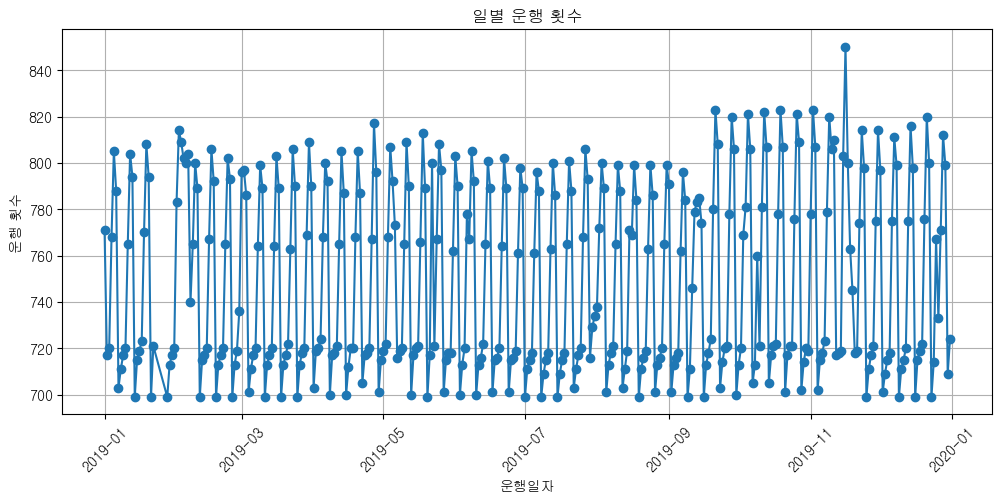

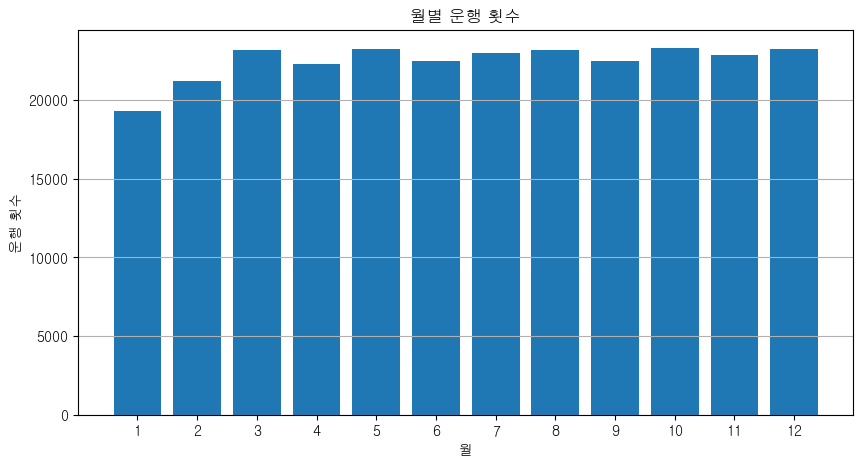

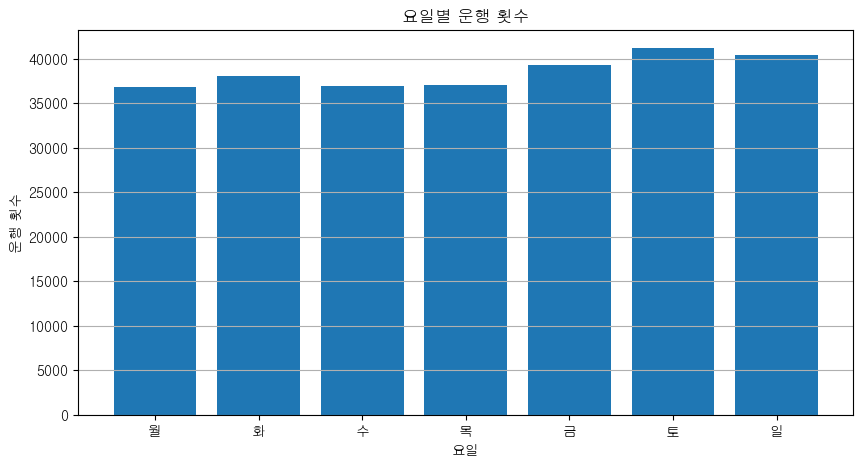

가장 많이 출발하는 역:
시발역코드
3900023    47279
3900025    33918
3900114    29554
3900096    12329
3900587    11868
3900242    10768
3900279    10683
3901040     9843
3900539     9037
3900361     8419
Name: count, dtype: int64

가장 많이 도착하는 역:
종착역코드
3900023    50144
3900025    31860
3900114    29300
3900096    12330
3900587    11861
3900242    10769
3900279    10682
3901040     9842
3900539     9038
3900361     8934
Name: count, dtype: int64

가장 많이 운행되는 노선:
       시발역코드    종착역코드  운행 횟수
164  3900114  3900023  24859
7    3900023  3900114  23901
611  3900437  3900025   7733
69   3900025  3900437   7725
65   3900025  3900279   7432
59   3900025  3900211   6881
420  3900279  3900025   6682
676  3900587  3900023   6493
286  3900211  3900025   6475
62   3900025  3900242   6285

열차 종류별 운행 횟수:
열차종별코드
무궁화        103318
KTX         57940
KTX-산천      32529
KTX-호남      19432
ITX-청춘      15476
ITX-새마을     14670
새마을         11813
통근열차         9544
누리로          5034
Name: count, dtype: int64

상행/하행 운행 비율:
상행하행구분코드

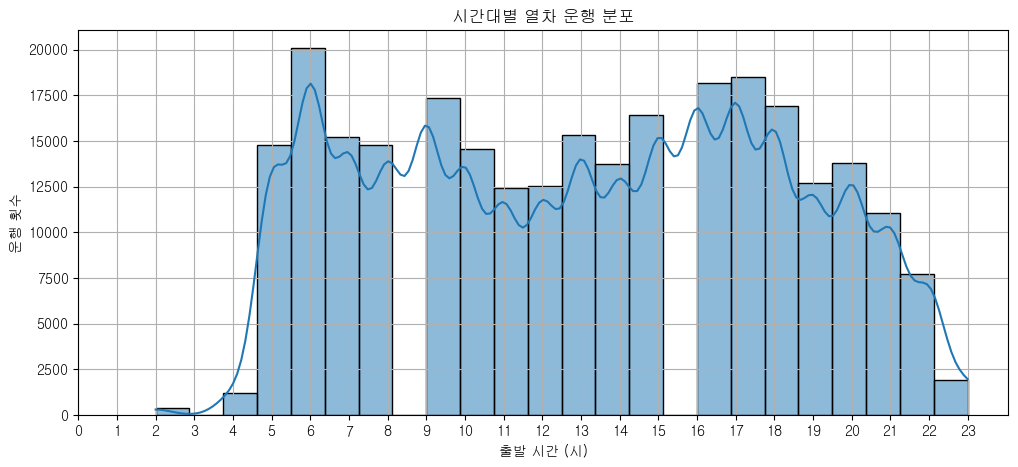

In [ ]:
# Load the CSV file
file_path = "./data/tr_3.csv"
df = pd.read_csv(file_path)

# Handling missing values
df = df.drop(columns=['분할병합구분코드'])  # Drop column with excessive missing values
df.loc[:, '운임등급코드'] = df['운임등급코드'].fillna(df['운임등급코드'].mode()[0])
df.loc[:, '편성순방향여부'] = df['편성순방향여부'].fillna(df['편성순방향여부'].mode()[0])

# Convert data types
df.loc[:, '운행일자'] = pd.to_datetime(df['운행일자'], format='%Y%m%d')
df.loc[:, '열차시발시각'] = pd.to_datetime(df['열차시발시각'], format='%H%M%S', errors='coerce').dt.time
df.loc[:, '열차종착시각'] = pd.to_datetime(df['열차종착시각'], format='%H%M%S', errors='coerce').dt.time

# Extract additional features
df.loc[:, '연도'] = df['운행일자'].dt.year
df.loc[:, '월'] = df['운행일자'].dt.month
df.loc[:, '요일'] = df['운행일자'].dt.dayofweek  # Monday=0, Sunday=6
df.loc[:, '열차시발시각_시간'] = pd.to_datetime(df['열차시발시각'], format='%H:%M:%S', errors='coerce').dt.hour

# Daily operation count
daily_counts = df.groupby('운행일자').size()
plt.figure(figsize=(12, 5))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-')
plt.title('일별 운행 횟수')
plt.xlabel('운행일자')
plt.ylabel('운행 횟수')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Monthly operation count
monthly_counts = df.groupby('월').size()
plt.figure(figsize=(10, 5))
plt.bar(monthly_counts.index, monthly_counts.values)
plt.title('월별 운행 횟수')
plt.xlabel('월')
plt.ylabel('운행 횟수')
plt.xticks(range(1, 13))
plt.grid(axis='y')
plt.show()

# Weekly operation count
weekly_counts = df.groupby('요일').size()
plt.figure(figsize=(10, 5))
plt.bar(weekly_counts.index, weekly_counts.values, tick_label=['월', '화', '수', '목', '금', '토', '일'])
plt.title('요일별 운행 횟수')
plt.xlabel('요일')
plt.ylabel('운행 횟수')
plt.grid(axis='y')
plt.show()

# Departure station frequency
departure_counts = df['시발역코드'].value_counts()
arrival_counts = df['종착역코드'].value_counts()
print("가장 많이 출발하는 역:")
print(departure_counts.head(10))
print("\n가장 많이 도착하는 역:")
print(arrival_counts.head(10))

# Popular train routes
route_counts = df.groupby(['시발역코드', '종착역코드']).size().reset_index(name='운행 횟수')
top_routes = route_counts.sort_values(by='운행 횟수', ascending=False).head(10)
print("\n가장 많이 운행되는 노선:")
print(top_routes)

# Train type distribution
train_type_counts = df['열차종별코드'].value_counts()
print("\n열차 종류별 운행 횟수:")
print(train_type_counts)

# Upbound and Downbound train ratio
direction_counts = df['상행하행구분코드'].value_counts()
print("\n상행/하행 운행 비율:")
print(direction_counts)

# Fare class distribution
fare_class_counts = df['운임등급코드'].value_counts()
print("\n운임 등급별 운행 횟수:")
print(fare_class_counts)

# Histogram of departure times
plt.figure(figsize=(12, 5))
sns.histplot(df['열차시발시각_시간'], bins=24, kde=True)
plt.title('시간대별 열차 운행 분포')
plt.xlabel('출발 시간 (시)')
plt.ylabel('운행 횟수')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269756 entries, 0 to 269755
Data columns (total 23 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   운행일자       269756 non-null  datetime64[ns]
 1   열차번호       269756 non-null  object        
 2   상행하행구분코드   269756 non-null  object        
 3   열차종별코드     269756 non-null  object        
 4   운행구분코드     269756 non-null  object        
 5   시발역코드      269756 non-null  int64         
 6   열차시발시각     269564 non-null  object        
 7   종착역코드      269756 non-null  int64         
 8   열차종착시각     269311 non-null  object        
 9   회송여부       269756 non-null  object        
 10  열차속성코드     269756 non-null  int64         
 11  운행경과일수     269756 non-null  int64         
 12  영업여부       269756 non-null  object        
 13  이전편성공개여부   269756 non-null  object        
 14  이후편성공개여부   269756 non-null  object        
 15  편성순방향여부    269756 non-null  object        
 16  운임등급코드     269756 no